In [1]:
import pandas as pd
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/생활인구 분석/생활이동/data/21년 10월/생활이동_행정동_2021.10_00시.csv', encoding='cp949')

In [3]:
df.head()

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202110,일,0,1109065,1109060,F,20,EH,30,4.36
1,202110,일,0,1112068,1112058,F,35,HW,10,3.02
2,202110,일,0,1125074,1125074,M,50,HH,20,3.27
3,202110,일,0,3113013,1106087,M,45,EH,20,3.2
4,202110,일,0,1125063,1111060,M,25,EH,30,*


In [4]:
df.dtypes

대상연월            int64
요일             object
도착시간            int64
출발 행정동 코드       int64
도착 행정동 코드       int64
성별             object
나이              int64
이동유형           object
평균 이동 시간(분)     int64
이동인구(합)        object
dtype: object

In [5]:
# 1106071	회기동
# 1106072	휘경1동
# 1106073	휘경2동
# 1106080	청량리동
# 1106081	용신동
# 1106082	제기동
# 1106083	전농1동
# 1106084	전농2동
# 1106086	답십리2동
# 1106087	장안1동
# 1106088	장안2동
# 1106089	이문1동
# 1106090	이문2동
# 1106091	답십리1동

In [6]:
code = [
    1106071, #회기동
    1106072, # 휘경1동
    1106073, # 휘경2동
    1106080, # 청량리동
    1106081, # 용신동
    1106082, # 제기동
    1106083, # 전농1동
    1106084, # 전농2동
    1106086, # 답십리2동
    1106087, # 장안1동
    1106088, # 장안2동
    1106089, # 이문1동
    1106090, # 이문2동
    1106091  # 답십리1동
]
df = df[df['출발 행정동 코드'].isin(code) | df['도착 행정동 코드'].isin(code)]

In [14]:
df.shape

(86738, 10)

## 월별로 동대문구만 추출 후 통합

### 데이터가 많아서 한번에 통합이 어려워 나눠서 통합 진행

In [57]:
def integrated(forder_name) :
    forders= os.listdir('C:/Users/user/Desktop/생활인구 분석/생활이동/data/'+forder_name)
    os.chdir('C:/Users/user/Desktop/생활인구 분석/생활이동/data/'+forder_name) 
    # 새로운 데이터 프레임 생성
    df_all = pd.DataFrame()

    code = [
        1106071, #회기동
        1106072, # 휘경1동
        1106073, # 휘경2동
        1106080, # 청량리동
        1106081, # 용신동
        1106082, # 제기동
        1106083, # 전농1동
        1106084, # 전농2동
        1106086, # 답십리2동
        1106087, # 장안1동
        1106088, # 장안2동
        1106089, # 이문1동
        1106090, # 이문2동
        1106091  # 답십리1동
    ]

    for files in forders:
        df= pd.read_csv(files, encoding='cp949')
        df = df[df['출발 행정동 코드'].isin(code) | df['도착 행정동 코드'].isin(code)]
        df_all= pd.concat([df_all, df])
    df_all.to_csv('C:/Users/user/Desktop/생활인구 분석/생활이동/data/'+forder_name+'/'+forder_name+' 통합.csv', encoding='cp949')

In [61]:
for i in range(1, 10) :
    integrated('22년 '+ str(i) +'월')

In [59]:
df_all.shape

(5649594, 10)

## 하나로 통합

In [63]:
forders= os.listdir('C:/Users/user/Desktop/생활인구 분석/생활이동/data/월별 통합본')

In [64]:
cd C:/Users/user/Desktop/생활인구 분석/생활이동/data/월별 통합본

C:\Users\user\Desktop\생활인구 분석\생활이동\data\월별 통합본


In [65]:
# 새로운 데이터 프레임 생성
df_all = pd.DataFrame()

for files in forders:
    df= pd.read_csv(files, encoding='cp949')
    df_all= pd.concat([df_all, df])

In [68]:
df_all = df_all.drop('Unnamed: 0', axis=1)

In [71]:
df_all.to_csv('C:/Users/user/Desktop/생활인구 분석/생활이동/data/통합최종본.csv', encoding='cp949')

## 통합본 불러오기 

In [2]:
df_all = pd.read_csv('C:/Users/user/Desktop/생활인구 분석/생활이동/data/통합최종본.csv', encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_7872\1364518079.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('C:/Users/user/Desktop/생활인구 분석/생활이동/data/통합최종본.csv', encoding='cp949')


In [3]:
df_all.head()
df_all = df_all.drop('Unnamed: 0', axis=1)

In [4]:
code = [
        1106071, #회기동
        1106072, # 휘경1동
        1106073, # 휘경2동
        1106080, # 청량리동
        1106081, # 용신동
        1106082, # 제기동
        1106083, # 전농1동
        1106084, # 전농2동
        1106086, # 답십리2동
        1106087, # 장안1동
        1106088, # 장안2동
        1106089, # 이문1동
        1106090, # 이문2동
        1106091  # 답십리1동
    ]

In [5]:
df_all.isnull().sum()

대상연월           0
요일             0
도착시간           0
출발 행정동 코드      0
도착 행정동 코드      0
성별             0
나이             0
이동유형           0
평균 이동 시간(분)    0
이동인구(합)        0
dtype: int64

## 동대문구 출발, 동대문구 도착 데이터프레임 나누기

In [6]:
df_all_arrival = df_all[df_all['도착 행정동 코드'].isin(code)] # 동대문구 도착

In [7]:
df_all_depart = df_all[df_all['출발 행정동 코드'].isin(code)] # 동대문구 출발

## 동대문구 출발 데이터프레임 분석

In [102]:
df_all_depart.groupby('대상연월').size()

대상연월
202110    3327787
202111    3346205
202112    3679771
202201    3118761
202202    2812794
202203    3081210
202204    3413872
202205    3725875
202206    3542036
202207    3567397
202208    3478108
202209    3639819
dtype: int64

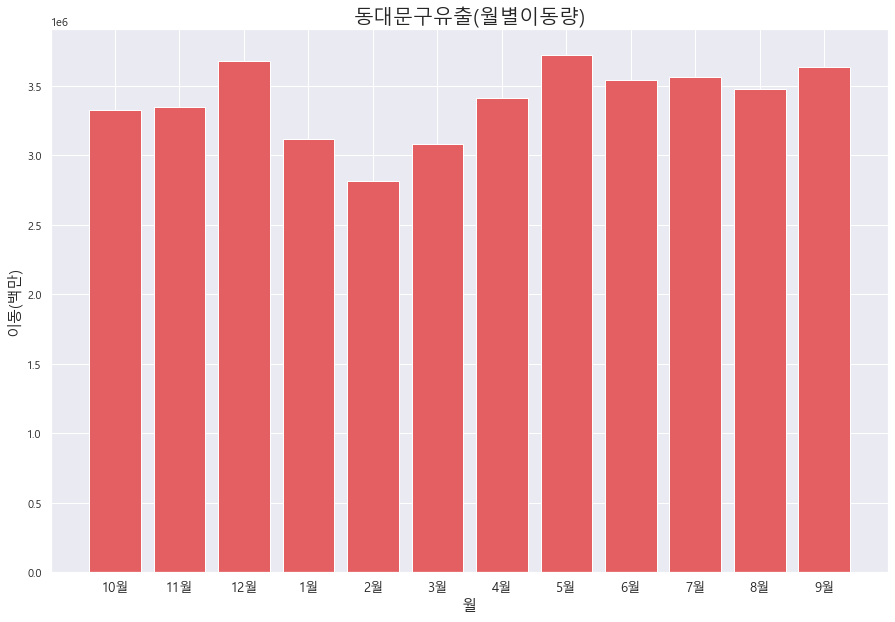

In [8]:
label = ['10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월']

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, df_all_depart.groupby('대상연월').size(), color='#e35f62')

plt.title('동대문구유출(월별이동량)', fontsize=20)

plt.xlabel('월', fontsize=15)

plt.ylabel('이동(백만)', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 동대문구 도착 데이터프레임 분석

In [110]:
df_all_arrival.groupby('대상연월').size()

대상연월
202110    3333866
202111    3357246
202112    3688704
202201    3124766
202202    2830862
202203    3088522
202204    3423698
202205    3736899
202206    3554711
202207    3578732
202208    3495334
202209    3647707
dtype: int64

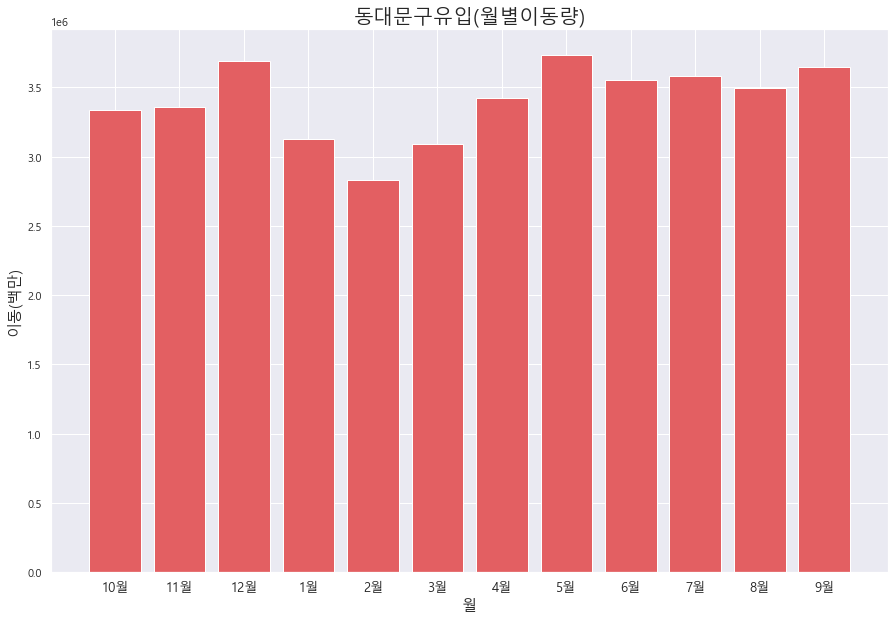

In [9]:
label = ['10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월']

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, df_all_arrival.groupby('대상연월').size(), color='#e35f62')

plt.title('동대문구유입(월별이동량)', fontsize=20)

plt.xlabel('월', fontsize=15)

plt.ylabel('이동(백만)', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 동대문 -> 다른 지역 상위 10개

In [125]:
df_all_depart[df_all_depart['도착 행정동 코드'] == 1106083].count()

대상연월           1420606
요일             1420606
도착시간           1420606
출발 행정동 코드      1420606
도착 행정동 코드      1420606
성별             1420606
나이             1420606
이동유형           1420606
평균 이동 시간(분)    1420606
이동인구(합)        1420606
dtype: int64

In [10]:
df_all_depart_arrival = df_all_depart.groupby('도착 행정동 코드').size()
df_all_depart_arrival = df_all_depart_arrival.sort_values()
df_all_depart_arrival[-10:]

도착 행정동 코드
1106086     802151
1106071     808683
1106089     867087
1106072     869557
1106087     931854
1106091     976603
1106081    1016107
1106082    1018449
1106088    1085896
1106083    1420606
dtype: int64

### 동대문구 -> 동대문구 외 지역

In [11]:
df_all_depart_out = df_all_depart[~df_all_depart['도착 행정동 코드'].isin(code)]

In [12]:
df_all_depart_arrival = df_all_depart_out.groupby('도착 행정동 코드').size()
df_all_depart_arrival = df_all_depart_arrival.sort_values()
df_all_depart_arrival[-10:]

도착 행정동 코드
1107062    254449
32000      262294
1108084    299320
1104054    335834
1108085    340796
1107060    362179
1104071    363439
1108060    385732
1101061    400741
1104070    429667
dtype: int64

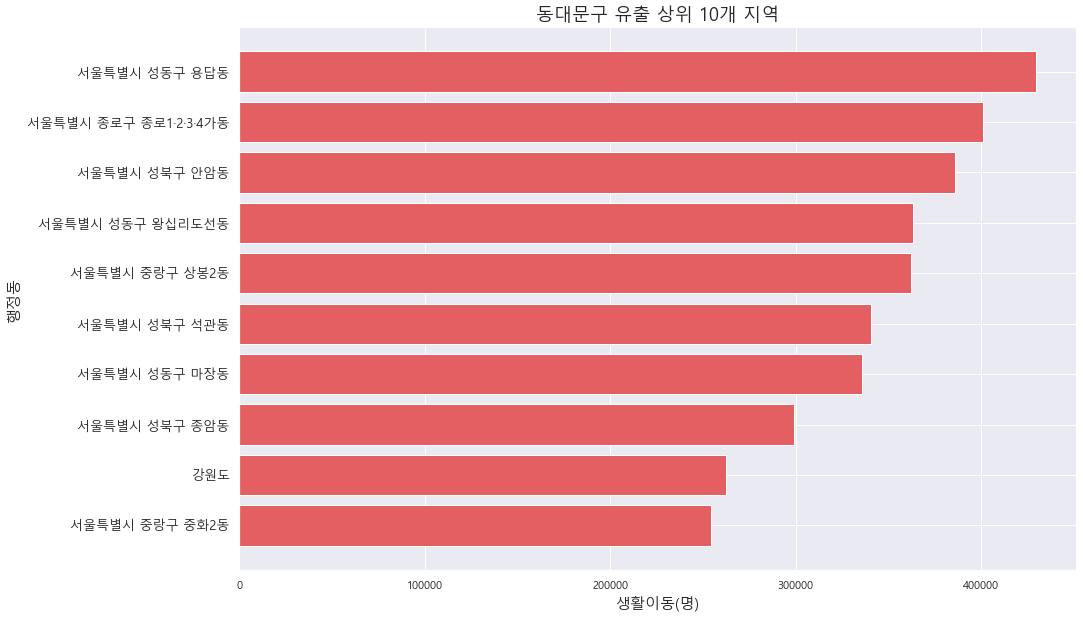

In [13]:
label = ['서울특별시 중랑구 중화2동', '강원도', '서울특별시 성북구 종암동', '서울특별시 성동구 마장동', '서울특별시 성북구 석관동', 
         '서울특별시 중랑구 상봉2동', '서울특별시 성동구 왕십리도선동', '서울특별시 성북구 안암동', 
         '서울특별시 종로구 종로1·2·3·4가동', '서울특별시 성동구 용답동']

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.barh(index, df_all_depart_arrival[-10:], color='#e35f62')

plt.title('동대문구 유출 상위 10개 지역', fontsize=18)

plt.ylabel('행정동', fontsize=15)

plt.xlabel('생활이동(명)', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()

### 동대문구 외 지역 -> 동대문구

In [14]:
df_all_arrival_in = df_all_arrival[~df_all_arrival['출발 행정동 코드'].isin(code)]
df_all_arrival_in

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202110,일,0,3113013,1106087,M,45,EH,20,3.2
1,202110,일,0,1101068,1106083,F,25,EH,10,6.05
5,202110,일,0,1111056,1106089,F,50,EH,40,3.09
7,202110,일,0,1108060,1106088,F,60,WH,20,11.49
8,202110,일,0,1104071,1106088,M,60,EH,10,3.53
...,...,...,...,...,...,...,...,...,...,...
69040098,202209,토,23,39000,1106088,M,25,EH,150,*
69040099,202209,토,23,39000,1106088,M,35,EE,145,*
69040100,202209,토,23,39000,1106088,M,55,EH,200,3.3
69040101,202209,토,23,39000,1106089,F,25,EH,186,12.11


In [15]:
df_all_depart_arrival = df_all_arrival_in.groupby('출발 행정동 코드').size()
df_all_depart_arrival = df_all_depart_arrival.sort_values()
df_all_depart_arrival[-10:]

출발 행정동 코드
32000      242019
1104055    251223
1108084    287797
1108085    326543
1104054    350942
1107060    350992
1104071    375456
1108060    400201
1104070    436455
1101061    453588
dtype: int64

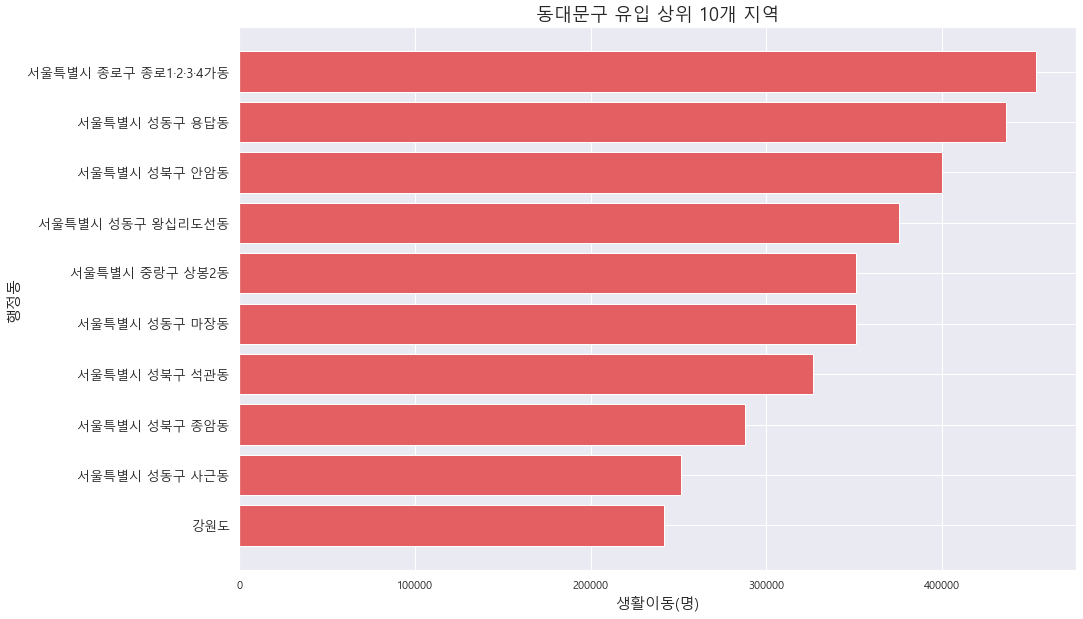

In [16]:
label = ['강원도', '서울특별시 성동구 사근동', '서울특별시 성북구 종암동','서울특별시 성북구 석관동', '서울특별시 성동구 마장동',
        '서울특별시 중랑구 상봉2동', '서울특별시 성동구 왕십리도선동', '서울특별시 성북구 안암동', '서울특별시 성동구 용답동',
        '서울특별시 종로구 종로1·2·3·4가동']

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.barh(index, df_all_depart_arrival[-10:], color='#e35f62')

plt.title('동대문구 유입 상위 10개 지역', fontsize=18)

plt.ylabel('행정동', fontsize=15)

plt.xlabel('생활이동(명)', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()

## 시간대별 동대문구 유입 인구

In [17]:
df_all_arrival_time = df_all_arrival_in.groupby('도착시간').size()
df_all_arrival_time

도착시간
0      560861
1      310493
2      213831
3      161149
4      164610
5      254519
6      496137
7      796298
8     1388829
9     1398172
10    1365673
11    1464365
12    1616481
13    1693186
14    1656436
15    1650477
16    1728394
17    1917243
18    2182020
19    2056763
20    1612570
21    1447120
22    1277960
23     892881
dtype: int64

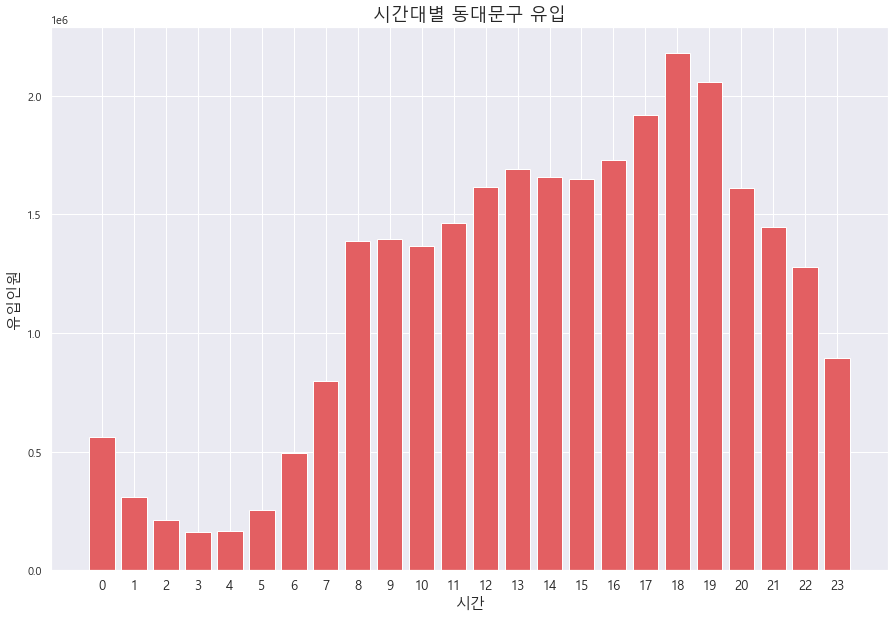

In [18]:
label = []
for i in range(len(df_all_arrival_time)) :
    label.append(i)

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, df_all_arrival_time, color='#e35f62')

plt.title('시간대별 동대문구 유입', fontsize=18)

plt.xlabel('시간', fontsize=15)

plt.ylabel('유입인원', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 시간대별 동대문구 유출 인구

In [19]:
df_all_depart_time = df_all_depart_out.groupby('도착시간').size()
df_all_depart_time

도착시간
0      489910
1      267408
2      175321
3      129505
4      122809
5      213289
6      472596
7      823314
8     1397592
9     1471736
10    1426145
11    1528672
12    1700590
13    1789320
14    1737454
15    1767382
16    1860690
17    2049119
18    2243368
19    2000302
20    1482824
21    1247174
22    1046207
23     736329
dtype: int64

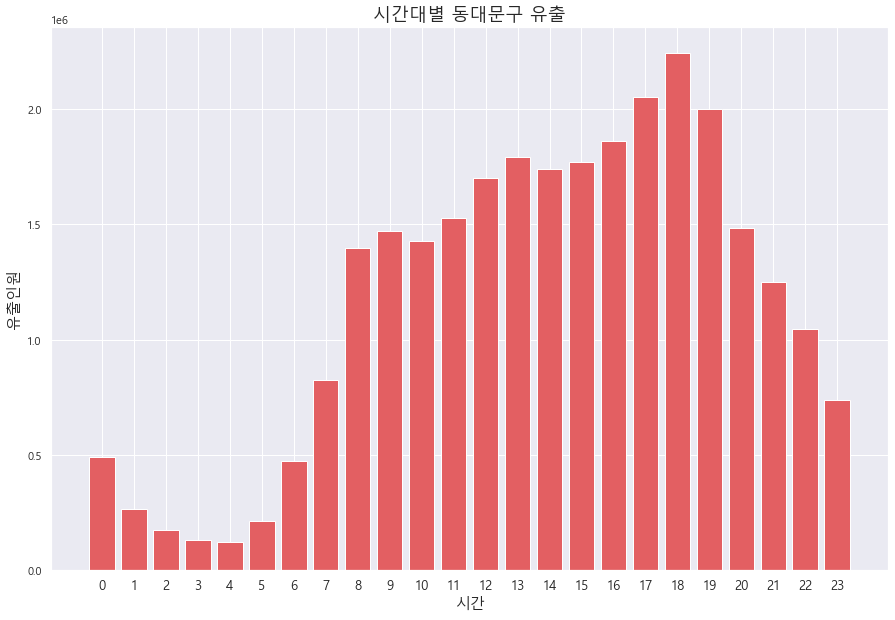

In [20]:
label = []
for i in range(len(df_all_depart_time)) :
    label.append(i)

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, df_all_depart_time, color='#e35f62')

plt.title('시간대별 동대문구 유출', fontsize=18)

plt.xlabel('시간', fontsize=15)

plt.ylabel('유출인원', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 요일별 동대문구 유입인구

In [21]:
df_all_arrival_day = df_all_arrival_in.groupby('요일').size()
df_all_arrival_day

요일
금    4326185
목    4115047
수    4076543
월    3920001
일    3476292
토    4069961
화    4322439
dtype: int64

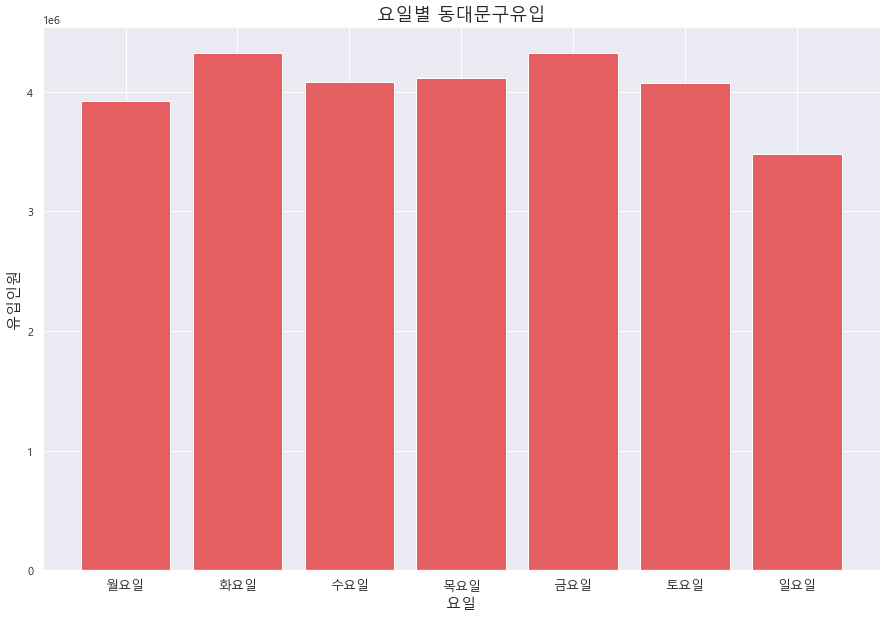

In [22]:
label = ['월요일', '화요일', '수요일', '목요일', '금요일','토요일', '일요일']

val = [3920001, 4322439, 4076543, 4115047, 4326185, 4069961, 3476292]

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, val, color='#e35f62')

plt.title('요일별 동대문구유입', fontsize=18)

plt.xlabel('요일', fontsize=15)

plt.ylabel('유입인원', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 요일별 동대문구 유출인구

In [23]:
df_all_depart_day = df_all_depart_out.groupby('요일').size()
df_all_depart_day

요일
금    4346529
목    4097985
수    4050331
월    3866183
일    3399506
토    4131392
화    4287130
dtype: int64

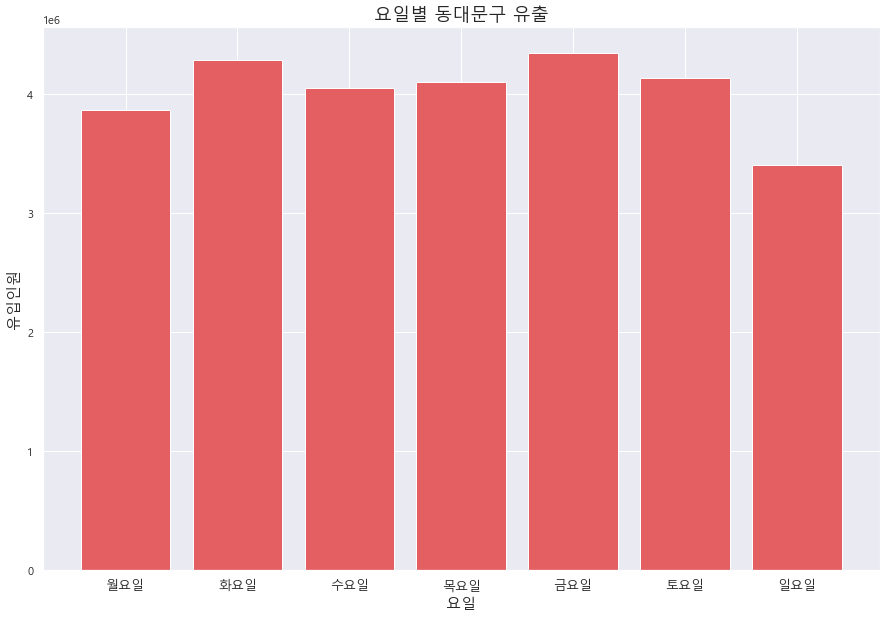

In [24]:
label = ['월요일', '화요일', '수요일', '목요일', '금요일','토요일', '일요일']

val = [3866183, 4287130, 4050331, 4097985, 4346529, 4131392, 3399506]

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.bar(index, val, color='#e35f62')

plt.title('요일별 동대문구 유출', fontsize=18)

plt.xlabel('요일', fontsize=15)

plt.ylabel('유입인원', fontsize=15)

plt.xticks(index, label, fontsize=13, rotation=0)

plt.show()

## 동대문구 -> 동대문구

In [25]:
df_all_arrival2 = df_all_arrival[df_all_arrival['출발 행정동 코드'].isin(code)]
df_all_arrival2 = df_all_arrival2.groupby('도착 행정동 코드').size()
df_all_arrival2 = df_all_arrival2.sort_values()
df_all_arrival2

도착 행정동 코드
1106090     436295
1106073     742759
1106080     783906
1106084     794626
1106086     802151
1106071     808683
1106089     867087
1106072     869557
1106087     931854
1106091     976603
1106081    1016107
1106082    1018449
1106088    1085896
1106083    1420606
dtype: int64

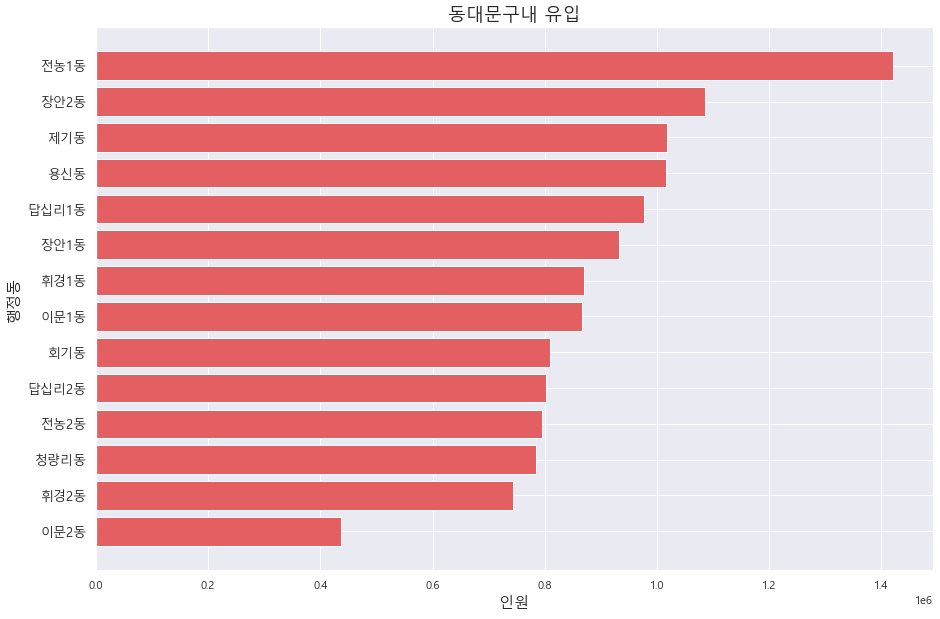

In [26]:
label = ['이문2동', '휘경2동', '청량리동', '전농2동', '답십리2동', '회기동', '이문1동', '휘경1동', '장안1동', '답십리1동', '용신동',
        '제기동', '장안2동', '전농1동']

index = np.arange(len(label))

plt.figure(figsize=(15, 10))

plt.barh(index, df_all_arrival2, color='#e35f62')

plt.title('동대문구내 유입', fontsize=18)


plt.ylabel('행정동', fontsize=15)

plt.xlabel('인원', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()